In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import os

In [70]:
filepath = "C:/Users/to09267/Documents/A321XLR/RETARD_COMPARISON"

liste_file=os.listdir(filepath)
print (liste_file)

['M11000V0217_1CSV', 'M11000V0231_92CSV', 'M11000V0231_93CSV', 'M11000V0231_94CSV', 'M11000V0232_95CSV', 'M11000V0232_96CSV', 'M11000V0232_97CSV', 'M11000V0232_98CSV', 'M11000V0232_99CSV', 'M11000V0233_100CSV', 'M11000V0233_101CSV', 'M11000V0233_102CSV', 'M11000V0233_103CSV', 'M11000V0233_104CSV', 'M11000V0233_105CSV', 'M11000V0233_106CSV', 'M11000V0233_107CSV', 'M11000V0233_108CSV', 'M11000V0233_109CSV', 'M11000V0233_110CSV', 'M11058V0096_111CSV', 'M11058V0096_112CSV', 'M11058V0096_113CSV', 'M11058V0096_114CSV', 'M11058V0096_115CSV', 'M11058V0096_116CSV', 'M11058V0096_117CSV', 'M11058V0097_118CSV', 'M11058V0097_119CSV', 'M11058V0097_120CSV', 'M11058V0097_121CSV', 'M11058V0097_122CSV', 'M11058V0097_123CSV', 'M11058V0100_124CSV', 'M11058V0100_125CSV', 'M11058V0100_126CSV', 'M11058V0100_127CSV', 'M11058V0100_128CSV', 'M11058V0100_129CSV', 'M11058V0101_130CSV', 'M11058V0101_131CSV', 'M11058V0101_132CSV', 'M11058V0101_133CSV', 'M11058V0101_134CSV', 'M11058V0101_135CSV', 'M11058V0101_136CSV

In [74]:
file_name='M11000V0217_1CSV'
df = pd.read_csv(os.path.join(filepath, file_name),sep=';',header=(0))

In [75]:
df.head()

,GMT_S,GMT,AIRCRAFT,ACMODEL,893-CODE--,893-NUME--,N1ACT_FGA1,N1TGT_FGA1,BRETARD_FGA1,IMPACT,Unnamed: 10,Unnamed: 11
0,5.651010e+06,066-09:43:29-875.000,321.0,251.0,0.0,217.0,43.46875,42.890625,1.0,0.0,NaN,NaN
1,5.651010e+06,066-09:43:29-937.500,321.0,251.0,0.0,217.0,43.46875,42.781250,1.0,0.0,NaN,NaN
2,5.651010e+06,066-09:43:30-000.000,321.0,251.0,0.0,217.0,43.46875,42.656250,1.0,0.0,NaN,NaN
3,5.651010e+06,066-09:43:30-062.500,321.0,251.0,0.0,217.0,43.46875,42.546875,1.0,0.0,NaN,NaN
4,5.651010e+06,066-09:43:30-125.000,321.0,251.0,0.0,217.0,43.46875,42.421875,1.0,0.0,NaN,NaN


In [76]:
liste = list(df)

for data in liste:
    typ=type (df[data][2])
    print (data,typ)  

GMT_S <class 'numpy.float64'>
GMT <class 'str'>
AIRCRAFT <class 'numpy.float64'>
ACMODEL <class 'numpy.float64'>
893-CODE-- <class 'numpy.float64'>
893-NUME-- <class 'numpy.float64'>
N1ACT_FGA1 <class 'numpy.float64'>
N1TGT_FGA1 <class 'numpy.float64'>
BRETARD_FGA1 <class 'numpy.float64'>
IMPACT <class 'numpy.float64'>
Unnamed: 10 <class 'numpy.float64'>
Unnamed: 11 <class 'numpy.float64'>


In [77]:
def convert_date(datestr):
#    tme = (int(datestr[0:2])*3600+int(datestr[3:5])*60+int(datestr[6:8]))*1000+int(datestr[9:12])
#    time = (int(datestr[4:6])*3600+int(datestr[7:9])*60+int(datestr[10:12]))*1000+int(datestr[13:16])
#    time = (int(datestr[11:13])*3600+int(datestr[14:16])*60+int(datestr[17:19]))*1000+int(datestr[20:23])
    time= (int(datestr[4:6])*3600+int(datestr[7:9])*60+int(datestr[10:12]))*1000+int(datestr[13:16])
    return time

In [78]:
def convert_float2str(x):
    st=str(int(x))
    return st

In [79]:
#079-09:06:26-312.500
datestr="079-09:06:26-312.500"
print (datestr[4:6],datestr[7:9],datestr[10:12],datestr[13:16],datestr[17:20])

09 06 26 312 500


In [80]:
df["time"]=df.apply(lambda row: convert_date(row['GMT']), axis=1)

In [81]:
df["AC"]=df.apply(lambda row:convert_float2str(row['AIRCRAFT']), axis=1)
df["ACMODEL"]=df.apply(lambda row:convert_float2str(row['ACMODEL']), axis=1)
df["essai"]=df.apply(lambda row:convert_float2str(row['893-NUME--']), axis=1)



In [82]:
flag=0
time_init=df.loc[0,'time'] #initial time of first dataframe sample
max_duration = 40000# on considère 20s de durée max, sinon on incrémente le numero essai
numes=1
for x in range(0, len(df)):
    time_current=df.loc[x,'time']
    if abs(time_current-time_init)< max_duration: # on considère 20s de durée max, sinon on incrémente le numero essai
        if (flag==0):
            df.loc[x,'gmt']=0
            time_start=df.loc[x,'time']
            df.loc[x,'essai']='essai_'+str(numes)
            df.loc[x,'numes']=numes
            flag=1
        else:
            df.loc[x,'gmt']=float(df.loc[x,'time']-time_start)/1000.0
            df.loc[x,'essai']='essai_'+str(numes)
            df.loc[x,'numes']=numes
            time_init= time_current # permet de prendre l'échantillon n-1
    else:
        numes=numes+1
        time_init= time_current
        df.loc[x,'gmt']=0
        time_start=df.loc[x,'time']
        df.loc[x,'essai']='essai_'+str(numes)
        df.loc[x,'numes']=numes
        flag=1

In [83]:
df.head()

,GMT_S,GMT,AIRCRAFT,ACMODEL,893-CODE--,893-NUME--,N1ACT_FGA1,N1TGT_FGA1,BRETARD_FGA1,IMPACT,Unnamed: 10,Unnamed: 11,time,AC,essai,gmt,numes
0,5.651010e+06,066-09:43:29-875.000,321.0,251,0.0,217.0,43.46875,42.890625,1.0,0.0,NaN,NaN,35009875,321,essai_1,0.000,1.0
1,5.651010e+06,066-09:43:29-937.500,321.0,251,0.0,217.0,43.46875,42.781250,1.0,0.0,NaN,NaN,35009937,321,essai_1,0.062,1.0
2,5.651010e+06,066-09:43:30-000.000,321.0,251,0.0,217.0,43.46875,42.656250,1.0,0.0,NaN,NaN,35010000,321,essai_1,0.125,1.0
3,5.651010e+06,066-09:43:30-062.500,321.0,251,0.0,217.0,43.46875,42.546875,1.0,0.0,NaN,NaN,35010062,321,essai_1,0.187,1.0
4,5.651010e+06,066-09:43:30-125.000,321.0,251,0.0,217.0,43.46875,42.421875,1.0,0.0,NaN,NaN,35010125,321,essai_1,0.250,1.0


In [84]:
print ('start of list')
binit=0

for file_name in liste_file:
    print(file_name)
    df = pd.read_csv(os.path.join(filepath, file_name),sep=';',header=(0))
   
# calcul du time
    df["time"]=df.apply(lambda row: convert_date(row['GMT']), axis=1)
    
# calcul du time normalisé
    flag=0
    time_init=df.loc[0,'time'] #initial time of first dataframe sample
    max_duration = 40000# on considère 20s de durée max, sinon on incrémente le numero essai
    numes=1
    for x in range(0, len(df)):
        time_current=df.loc[x,'time']
        if abs(time_current-time_init)< max_duration: # on considère 20s de durée max, sinon on incrémente le numero essai
            if (flag==0):
                df.loc[x,'gmt']=0
                time_start=df.loc[x,'time']
                df.loc[x,'essai']='essai_'+str(numes)
                df.loc[x,'numes']=numes
                flag=1
            else:
                df.loc[x,'gmt']=float(df.loc[x,'time']-time_start)/1000.0
                df.loc[x,'essai']='essai_'+str(numes)
                df.loc[x,'numes']=numes
                time_init= time_current # permet de prendre l'échantillon n-1
        else:
            numes=numes+1
            time_init= time_current
            df.loc[x,'gmt']=0
            time_start=df.loc[x,'time']
            df.loc[x,'essai']='essai_'+str(numes)
            df.loc[x,'numes']=numes
            flag=1
            
    if binit==0:
        dataset= df
        binit=1
        print ('\t -> init done')
    else:
        dataset=pd.concat([dataset,df],axis=0)
        print ("\t -> appending data")

start of list
M11000V0217_1CSV
	 -> init done
M11000V0231_92CSV
	 -> appending data
M11000V0231_93CSV
	 -> appending data
M11000V0231_94CSV
	 -> appending data
M11000V0232_95CSV
	 -> appending data
M11000V0232_96CSV
	 -> appending data
M11000V0232_97CSV
	 -> appending data
M11000V0232_98CSV
	 -> appending data
M11000V0232_99CSV
	 -> appending data
M11000V0233_100CSV
	 -> appending data
M11000V0233_101CSV
	 -> appending data
M11000V0233_102CSV
	 -> appending data
M11000V0233_103CSV
	 -> appending data
M11000V0233_104CSV
	 -> appending data
M11000V0233_105CSV
	 -> appending data
M11000V0233_106CSV
	 -> appending data
M11000V0233_107CSV
	 -> appending data
M11000V0233_108CSV
	 -> appending data
M11000V0233_109CSV
	 -> appending data
M11000V0233_110CSV
	 -> appending data
M11058V0096_111CSV
	 -> appending data
M11058V0096_112CSV
	 -> appending data
M11058V0096_113CSV
	 -> appending data
M11058V0096_114CSV
	 -> appending data
M11058V0096_115CSV
	 -> appending data
M11058V0096_116CSV
	 -> ap

In [85]:
dataset.describe

<bound method NDFrame.describe of            GMT_S                   GMT  AIRCRAFT  ACMODEL  893-CODE--  \
0   5.651010e+06  066-09:43:29-875.000     321.0    251.0         0.0   
1   5.651010e+06  066-09:43:29-937.500     321.0    251.0         0.0   
2   5.651010e+06  066-09:43:30-000.000     321.0    251.0         0.0   
3   5.651010e+06  066-09:43:30-062.500     321.0    251.0         0.0   
4   5.651010e+06  066-09:43:30-125.000     321.0    251.0         0.0   
..           ...                   ...       ...      ...         ...   
80  1.178196e+07  137-08:45:59-500.000     321.0    271.0         0.0   
81  1.178196e+07  137-08:45:59-562.500     321.0    271.0         0.0   
82  1.178196e+07  137-08:45:59-625.000     321.0    271.0         0.0   
83  1.178196e+07  137-08:45:59-687.500     321.0    271.0         0.0   
84  1.178196e+07  137-08:45:59-750.000     321.0    271.0         0.0   

    893-NUME--  N1ACT_FGA1  N1TGT_FGA1  BRETARD_FGA1  IMPACT  Unnamed: 10  \
0        217

C:\Temp\ipykernel_9256\2215503051.py:12: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  sns.lineplot(x="gmt", palette=palette, y="N1ACT_FGA1",hue='ACMODEL',data=dataset)


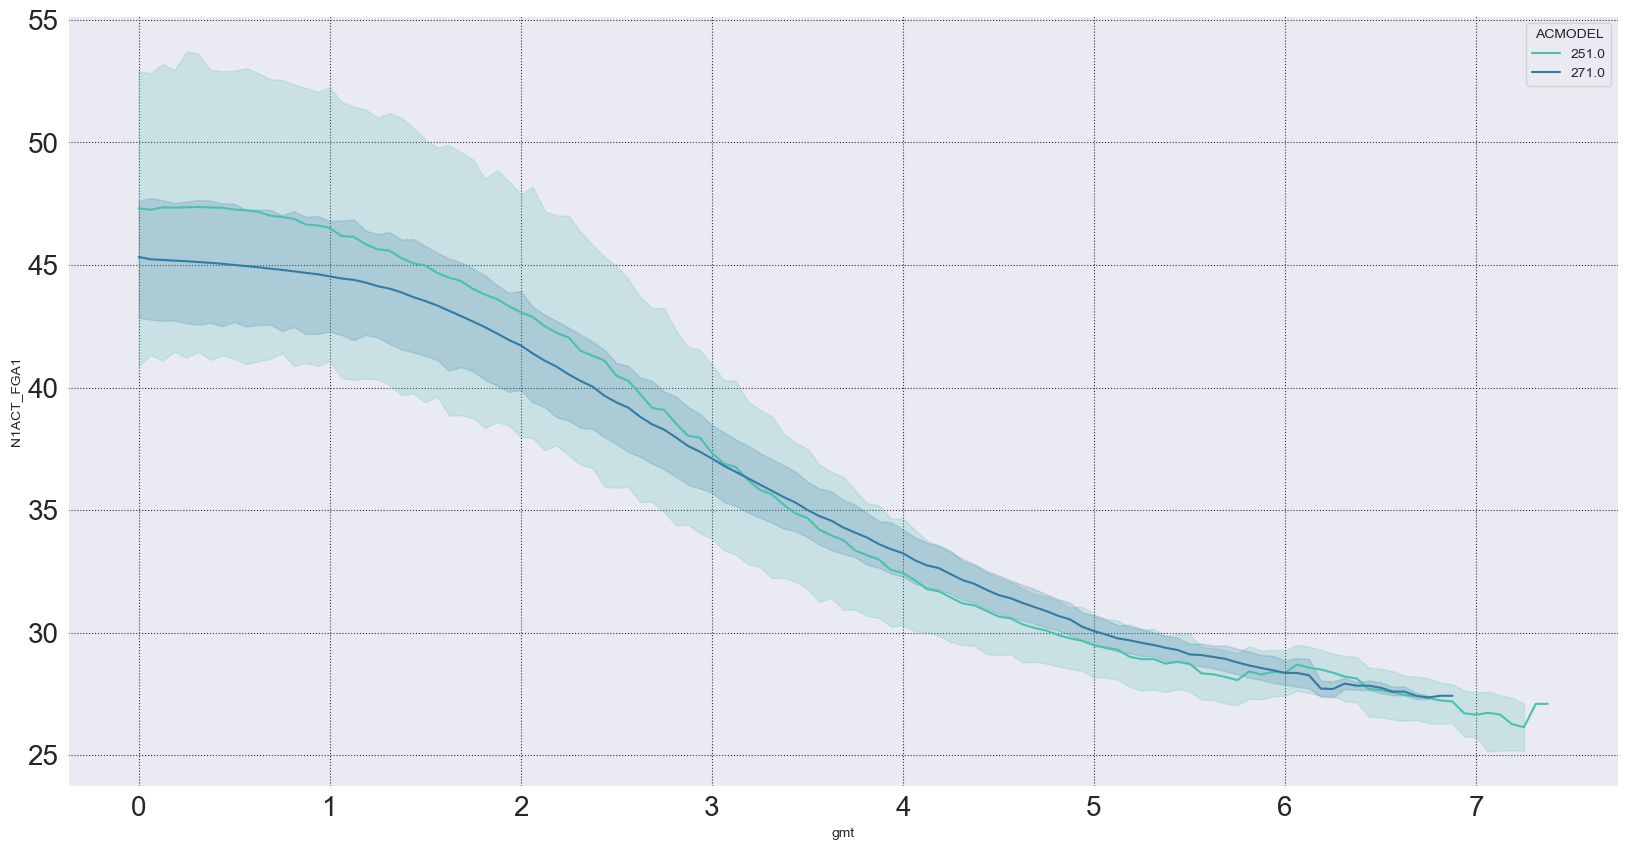

In [95]:
plt.figure(1, figsize = (20,10))
sns.set_style("darkgrid", {"grid.color": "0.2", "grid.linestyle": ":"})
#axes = plt.gca()
#axes.set_ylim(-20, 2)
#axes.yaxis.set_ticks(range(11))
axes.yaxis.set_tick_params(direction = 'out', length = 20, width = 5,
                           color = 'black', labelsize = 20, pad = 20,
                           labelcolor = 'black', right = True, left = True)
plt.gca().yaxis.set_tick_params(labelsize = 20)
plt.gca().xaxis.set_tick_params(labelsize = 20)
palette = sns.color_palette("mako_r", 3)
sns.lineplot(x="gmt", palette=palette, y="N1ACT_FGA1",hue='ACMODEL',data=dataset)
plt.show()